# Submission Information:

### Team Member 1:
* UNI:  hsa2136
* Name: Husam Abdul-Kafi

# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

In [1]:
RUNNING_ON_TRAVIS = True

In [2]:
#write code below, you can make multiple cells
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [3]:
data = pd.read_csv("data/data.csv")
test = pd.read_csv("data/holdout.csv")

In [4]:
data['subscribed'][data['subscribed'] == 'no'] = 0
data['subscribed'][data['subscribed'] == 'yes'] = 1

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
data['job'] = pd.Categorical(data['job']).codes
data['marital_status'] = pd.Categorical(data['marital_status']).codes
data['education'] = pd.Categorical(data['education']).codes
# data['credit_default'].value_counts()
data = data.drop('credit_default',axis=1)
data['housing'] = pd.Categorical(data['housing']).codes
data['loan'] = pd.Categorical(data['loan']).codes
data['contact'] = pd.Categorical(data['contact']).codes
data['prev_outcomes'] = pd.Categorical(data['prev_outcomes']).codes
# data['prev_days'][data['prev_days'] == 999] = np.nan

In [6]:
test['job'] = pd.Categorical(test['job']).codes
test['marital_status'] = pd.Categorical(test['marital_status']).codes
test['education'] = pd.Categorical(test['education']).codes
# test['credit_default'].value_counts()
test = test.drop('credit_default',axis=1)
test['housing'] = pd.Categorical(test['housing']).codes
test['loan'] = pd.Categorical(test['loan']).codes
test['contact'] = pd.Categorical(test['contact']).codes
test['prev_outcomes'] = pd.Categorical(test['prev_outcomes']).codes
test = test.drop('ID', axis=1)
# test['prev_days'][test['prev_days'] == 999] = np.nan

In [7]:
full_train_X = data[['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']].as_matrix()
full_test_X = test[['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']].as_matrix()
full_train_y = data['subscribed'].values.astype('float')

In [8]:
train, test = train_test_split(data, test_size = 0.2)
train_X = train[['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']].as_matrix()
test_X = test[['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed']].as_matrix()
train_y = train['subscribed'].values.astype('float')
test_y = test['subscribed'].values.astype('float')


In [9]:
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))
X_pca = pca_scaled.fit_transform(train_X)

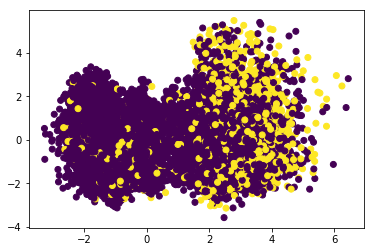

In [10]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c = train_y)

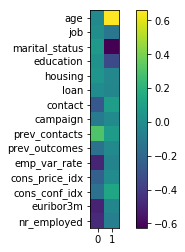

In [11]:
plt.imshow(pca_scaled.named_steps['pca'].components_.T)
plt.yticks(range(len(['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'])),['age', 'job', 'marital_status', 'education', 'housing', 'loan',
       'contact', 'campaign',
       'prev_contacts', 'prev_outcomes', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'])
plt.colorbar()

# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

## Logistic Regression

In [12]:
logreg = LogisticRegressionCV(n_jobs=5, scoring='roc_auc').fit(train_X, train_y)
print(roc_auc_score(test_y, logreg.decision_function(test_X)))
print(logreg.score(test_X, test_y))

0.758680194515
0.892716236722


In [13]:
logreg = LogisticRegressionCV(n_jobs=5, scoring='roc_auc', class_weight='balanced').fit(train_X, train_y)
print(roc_auc_score(test_y, logreg.decision_function(test_X)))
print(logreg.score(test_X, test_y))

0.761412422163
0.744916540212


In [14]:
pipe_logreg = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression())
if not RUNNING_ON_TRAVIS:
    parameters = {'logisticregression__class_weight': ['balanced', None],
                  'logisticregression__C': np.logspace(-3, 2, 6)
                 }
    grid_logreg = GridSearchCV(pipe_logreg, param_grid=parameters, cv=5, n_jobs=8, scoring='roc_auc')
    grid_logreg.fit(train_X, train_y)

    print(roc_auc_score(test_y, grid_logreg.decision_function(test_X)))
    print(grid_logreg.best_params_)
    logreg_best_params = grid_logreg.best_params_
else:
    logreg_best_params = {'logisticregression__C': 1.0, 'logisticregression__class_weight': None}
    pipe_logreg.set_params(**logreg_best_params)
    grid_logreg =  pipe_logreg.fit(train_X, train_y)
    print(roc_auc_score(test_y, grid_logreg.decision_function(test_X)))

0.783641138014


0.792734060465


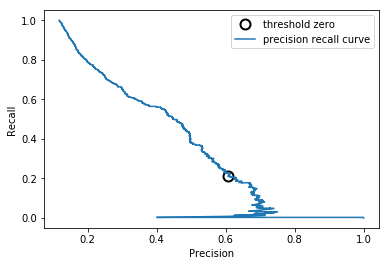

In [15]:
precision, recall, thresholds = precision_recall_curve(
        test_y, grid_logreg.decision_function(test_X))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
        label = "threshold zero", fillstyle="none", c = 'k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

## Linear Support Vector Classifier

In [16]:
linsvc = LinearSVC(class_weight='balanced').fit(train_X, train_y)
print(roc_auc_score(test_y, linsvc.decision_function(test_X)))
print(linsvc.score(test_X, test_y))

0.740977552626
0.883004552352


In [17]:
pipe_svc = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearSVC())
if not RUNNING_ON_TRAVIS:
    parameters_svc = {'linearsvc__C': np.logspace(-3, 2, 6),
                      'linearsvc__loss': ["hinge", "squared_hinge"]
                     }
    grid_svc = GridSearchCV(pipe_svc, param_grid=parameters_svc, cv=5, n_jobs=8, scoring='roc_auc')
    grid_svc.fit(train_X, train_y)
    print(roc_auc_score(test_y, grid_svc.decision_function(test_X)))
    print(grid_svc.best_params_)
    svc_best_params = grid_svc.best_params_
else:
    svc_best_params = {'linearsvc__C': 0.01, 'linearsvc__loss': 'squared_hinge'}
    pipe_svc.set_params(**svc_best_params)
    grid_svc = pipe_svc.fit(train_X, train_y)
    print(roc_auc_score(test_y, grid_svc.decision_function(test_X)))

0.779293601688


0.784837056041
{'linearsvc__C': 0.01, 'linearsvc__loss': 'squared_hinge'}


# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

## Regular Decision Tree

In [18]:

if not RUNNING_ON_TRAVIS:
    leaves = list(range(2,20))
    leaves.append(None)
    depth = list(range(1,4))
    depth.append(None)
    param_grid_tree = {'max_leaf_nodes': leaves, 'max_depth': depth}
    grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid_tree, n_jobs= 8, cv = 5)
    grid_tree.fit(train_X, train_y)
    preds_tree = grid_tree.predict_proba(test_X)[:, 1]
    print(roc_auc_score(test_y, preds_tree))
    tree_best_params = grid_tree.best_params_
    print(tree_best_params)
else:
    tree_best_params = {'max_leaf_nodes': 12, 'max_depth': None}
    grid_tree = DecisionTreeClassifier(**tree_best_params)
    grid_tree.fit(train_X, train_y)
    preds_tree = grid_tree.predict_proba(test_X)[:, 1]
    print(roc_auc_score(test_y, preds_tree))
    

0.759042284889


## Random Forests

In [19]:

if not RUNNING_ON_TRAVIS:
    depth = list(range(1,4))
    depth.append(None)
    param_grid_rf = {"n_estimators": range(10,511, 100), 
                     'max_depth': depth, 
                     'min_samples_split': range(2,11,2), 
                     'min_samples_leaf': range(1,6)}
    grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid_rf, cv=5, n_jobs=8)
    grid_rf.fit(train_X, train_y)
    pred_rf_grid = grid_rf.predict_proba(test_X)[:, 1]
    print(roc_auc_score(test_y, pred_rf_grid))
    rf_best_params = grid_rf.best_params_
    print(rf_best_params)
else:
    rf_best_params = {'n_estimators': 210, 'min_samples_leaf': 3, 'max_depth': None, 'min_samples_split': 8}
    grid_rf = RandomForestClassifier(random_state=0, **rf_best_params)
    grid_rf.fit(train_X, train_y)
    pred_rf_grid = grid_rf.predict_proba(test_X)[:, 1]
    print(roc_auc_score(test_y, pred_rf_grid))
    

0.768602518384


## Gradient Boosting

In [24]:
if not RUNNING_ON_TRAVIS:
    xgb_best_params = {}
    # Check for best max_depth and min_child_weight
    param_xgb = {
        'max_depth':range(3,10,2),
        'min_child_weight':range(1,6,2)
    }
    grid_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
                                             gamma=0, subsample=0.8, colsample_bytree=0.8,
                                            objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0), 
                                            param_grid = param_xgb, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
    grid_xgb.fit(train_X, train_y)
    print(grid_xgb.best_params_)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))
    xgb_best_params.update(grid_xgb.best_params_)
    
    # Check for best gamma
    param_xgb = {
        'gamma':[i/10.0 for i in range(0,5)]
    }
    grid_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                            min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
                                            objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0), 
                                            param_grid = param_xgb, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
    grid_xgb.fit(train_X, train_y)
    print(grid_xgb.best_params_)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))
    xgb_best_params.update(grid_xgb.best_params_)
    
    # Check for best subsample and colsample_bytree
    param_xgb = {
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)]
    }
    grid_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                            gamma=0.3, min_child_weight=5, 
                                            objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0), 
                                            param_grid = param_xgb, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
    grid_xgb.fit(train_X, train_y)
    print(grid_xgb.best_params_)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))
    xgb_best_params.update(grid_xgb.best_params_)
    
    # Check for best reg_alpha
    param_xgb = {
        'reg_alpha':[1e-5, 1e-2, 0.1, 0, 0.001, 0.005, 0.01, 0.05, 1, 100]
    }
    grid_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
                                            gamma=0.3, min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
                                            objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0), 
                                            param_grid = param_xgb, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
    grid_xgb.fit(train_X, train_y)
    print(grid_xgb.best_params_)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))
    xgb_best_params.update(grid_xgb.best_params_)
    
    # Check for best n_estimators
    param_xgb = {
        'n_estimators':range(10, 311, 25)
    }
    grid_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, reg_alpha=0.001, max_depth=3,
                                            gamma=0.3, min_child_weight=5, subsample=0.8, colsample_bytree=0.8,
                                            objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0), 
                                            param_grid = param_xgb, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
    grid_xgb.fit(train_X, train_y)
    print(grid_xgb.best_params_)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))
    xgb_best_params.update(grid_xgb.best_params_)
    
else:
    xgb_best_params = {'min_child_weight': 5, 'max_depth': 3, 
                       'gamma': 0.3, 'subsample': 0.8, 'n_estimators':85,
                       'colsample_bytree': 0.8, 'reg_alpha': 0.001}
    grid_xgb = XGBClassifier( learning_rate =0.1,objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0, **xgb_best_params)
    grid_xgb.fit(train_X, train_y)
    print(roc_auc_score(test_y, grid_xgb.predict_proba(test_X)[:,1]))

0.783606366639


# Step4 - Ensemble [20 points + 10 Bonus points]

In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

In [28]:
voting = VotingClassifier([('logreg',make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression()).set_params(**logreg_best_params)),
#                            ('svc', make_pipeline(StandardScaler(), PolynomialFeatures(), LinearSVC()).set_params(**svc_best_params)),
                           ('dec_tree', DecisionTreeClassifier(random_state=0,**tree_best_params)),
                           ('rf',RandomForestClassifier(random_state=0, **rf_best_params)),
                           ('gxb',XGBClassifier( learning_rate =0.1,objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=0, **xgb_best_params))],
                         voting='soft')

In [30]:
reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1,8)[:, 1::2], validate=False)
first_stage = make_pipeline(voting, reshaper)
transform_cv = cross_val_predict(first_stage, train_X, train_y, cv=5, method='transform')
first_stage.fit(train_X, train_y)

Pipeline(steps=[('votingclassifier', VotingClassifier(estimators=[('logreg', Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression...1ba60>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False))])

In [43]:
second_stage = LogisticRegression(C=.001).fit(transform_cv, train_y)
vote_roc_score = roc_auc_score(test_y, second_stage.predict_proba(first_stage.transform(test_X))[:,1])

In [46]:
assert(vote_roc_score > .77)